# Geração de Dados Simulados para Classificação de Obstáculos

Este notebook gera dados sintéticos simulando leituras de um sensor ultrassônico (HC-SR04) para diferentes tipos de obstáculos, conforme o planejamento do projeto "Classificação de Obstáculos com Sensor Simulado e IA".

**Etapas:**
1. Instalação e importação de bibliotecas
2. Definição dos tipos de obstáculos
3. Funções de simulação
4. Geração do dataset
5. Salvamento do dataset

---


## 1. Instalação e Importação de Bibliotecas

Instale e importe as bibliotecas necessárias para manipulação de dados e geração de números aleatórios.

In [2]:
# Instalar (caso necessário) e importar bibliotecas
import numpy as np
import pandas as pd
import random

# Reprodutibilidade
np.random.seed(42)


## 2. Definição dos Tipos de Obstáculos

Defina os tipos de obstáculos a serem simulados e associe um ID numérico a cada um.

In [3]:
# Dicionário de tipos de obstáculos acima da linha da cintura
obstaculos = {
    1: 'Pessoa em Movimento',
    2: 'Pessoa Parada',
    3: 'Fixos acima da linha da cintura',
    4: 'Moveis acima da linha da cintura',
    5: 'Parede acima da linha da cintura',
    6: 'Galhos de Árvore acima da linha da cintura',
    7: 'Marquises ou tetos com pé direito abaixo de 2 metros'
}


## 3. Funções de Simulação

Implemente funções para simular leituras de distância ao longo do tempo para cada tipo de obstáculo. Inclua parâmetros como distância inicial, velocidade, duração e ruído.

In [4]:
import numpy as np

# Funções de simulação para cada tipo de obstáculo
# Todas as funções usam parâmetros padronizados: dist_inicial, dist, velocidade, duracao, ruido

def simular_pessoa_movimento(dist_inicial=200, velocidade=-0.5, duracao=100, ruido=2):
    """Simula uma pessoa em movimento se aproximando ou se afastando do sensor."""
    return [max(0, dist_inicial + velocidade*t + np.random.normal(0, ruido)) for t in range(duracao)]

def simular_pessoa_parada(dist=180, duracao=100, ruido=1.5):
    """Simula uma pessoa parada, distância constante com pouco ruído."""
    return list(np.full(duracao, dist) + np.random.normal(0, ruido, duracao))

def simular_fixo_alto(dist=220, duracao=100, ruido=1):
    """Simula um objeto fixo acima da linha da cintura."""
    return list(np.full(duracao, dist) + np.random.normal(0, ruido, duracao))

def simular_movel_alto(dist_inicial=200, velocidade=-0.3, duracao=80, ruido=2):
    """Simula um objeto móvel acima da linha da cintura."""
    return [max(0, dist_inicial + velocidade*t + np.random.normal(0, ruido)) for t in range(duracao)]

def simular_parede_alta(dist=150, duracao=100, ruido=0.8):
    """Simula uma parede acima da linha da cintura."""
    return list(np.full(duracao, dist) + np.random.normal(0, ruido, duracao))

def simular_galho_arvore(dist_inicial=90, velocidade=-0.1, duracao=70, ruido=6):
    """Simula galhos de árvore acima da linha da cintura."""
    return [max(0, dist_inicial + velocidade*t + np.random.normal(0, ruido)) for t in range(duracao)]

def simular_marquise(dist=210, duracao=60, ruido=3):
    """Simula marquises ou tetos baixos (pé direito < 2m)."""
    return list(np.full(duracao, dist) + np.random.normal(0, ruido, duracao))


## 4. Geração do Dataset Simulado

Gere várias sequências para cada tipo de obstáculo e combine em um DataFrame Pandas com as colunas: timestamp, distancia_cm, tipo_obstaculo, id_cenario.

In [5]:
# Mapeamento de tipo para função de simulação
simuladores = {
    1: simular_pessoa_movimento,
    2: simular_pessoa_parada,
    3: simular_fixo_alto,
    4: simular_movel_alto,
    5: simular_parede_alta,
    6: simular_galho_arvore,
    7: simular_marquise
}

cenarios_por_tipo = 20  # Quantos cenários de cada tipo
sequencias = []
id_cenario = 0

for tipo, nome in obstaculos.items():
    for _ in range(cenarios_por_tipo):
        # Parâmetros realistas para cada tipo
        if tipo == 1:
            distancias = simuladores[tipo](dist_inicial=np.random.randint(150, 250), velocidade=np.random.uniform(-1, -0.2), duracao=100, ruido=2)
        elif tipo == 2:
            distancias = simuladores[tipo](dist=np.random.randint(160, 200), duracao=100, ruido=1.5)
        elif tipo == 3:
            distancias = simuladores[tipo](dist=np.random.randint(180, 250), duracao=100, ruido=1)
        elif tipo == 4:
            distancias = simuladores[tipo](dist_inicial=np.random.randint(150, 220), velocidade=np.random.uniform(-0.6, 0.2), duracao=80, ruido=2)
        elif tipo == 5:
            distancias = simuladores[tipo](dist=np.random.randint(120, 200), duracao=100, ruido=0.8)
        elif tipo == 6:
            distancias = simuladores[tipo](dist_inicial=np.random.randint(60, 120), velocidade=np.random.uniform(-0.3, 0.1), duracao=70, ruido=6)
        elif tipo == 7:
            distancias = simuladores[tipo](dist=np.random.randint(180, 230), duracao=60, ruido=3)
        else:
            continue
        for t, d in enumerate(distancias):
            sequencias.append({
                'timestamp': t,
                'distancia_cm': d,
                'tipo_obstaculo': tipo,
                'nome_obstaculo': nome,
                'id_cenario': id_cenario,
                'duracao': len(distancias)
            })
        id_cenario += 1

df = pd.DataFrame(sequencias)
df.head()

,timestamp,distancia_cm,tipo_obstaculo,nome_obstaculo,id_cenario,duracao
0,0,202.295377,1,Pessoa em Movimento,0,100
1,1,203.806631,1,Pessoa em Movimento,0,100
2,2,200.052836,1,Pessoa em Movimento,0,100
3,3,199.813440,1,Pessoa em Movimento,0,100
4,4,203.200711,1,Pessoa em Movimento,0,100


### Validação dos tipos simulados
Verifique se todos os tipos definidos no dicionário estão presentes no DataFrame:

In [6]:
print('Tipos presentes no DataFrame:', sorted(df['tipo_obstaculo'].unique()))
print('Tipos definidos no dicionário:', sorted(obstaculos.keys()))
assert set(df['tipo_obstaculo'].unique()) == set(obstaculos.keys()), 'Nem todos os tipos foram simulados!'


Tipos presentes no DataFrame: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Tipos definidos no dicionário: [1, 2, 3, 4, 5, 6, 7]


## 5. Salvamento do Dataset

Salve o DataFrame gerado em um arquivo CSV para uso posterior.

In [7]:
# Salvar o dataset em CSV
nome_arquivo = 'dados_sensores_simulados.csv'
df.to_csv(nome_arquivo, index=False)
print(f"Dataset salvo como {nome_arquivo}")


Dataset salvo como dados_sensores_simulados.csv


### Exemplo de visualização
Visualize algumas sequências simuladas para diferentes tipos de obstáculos.

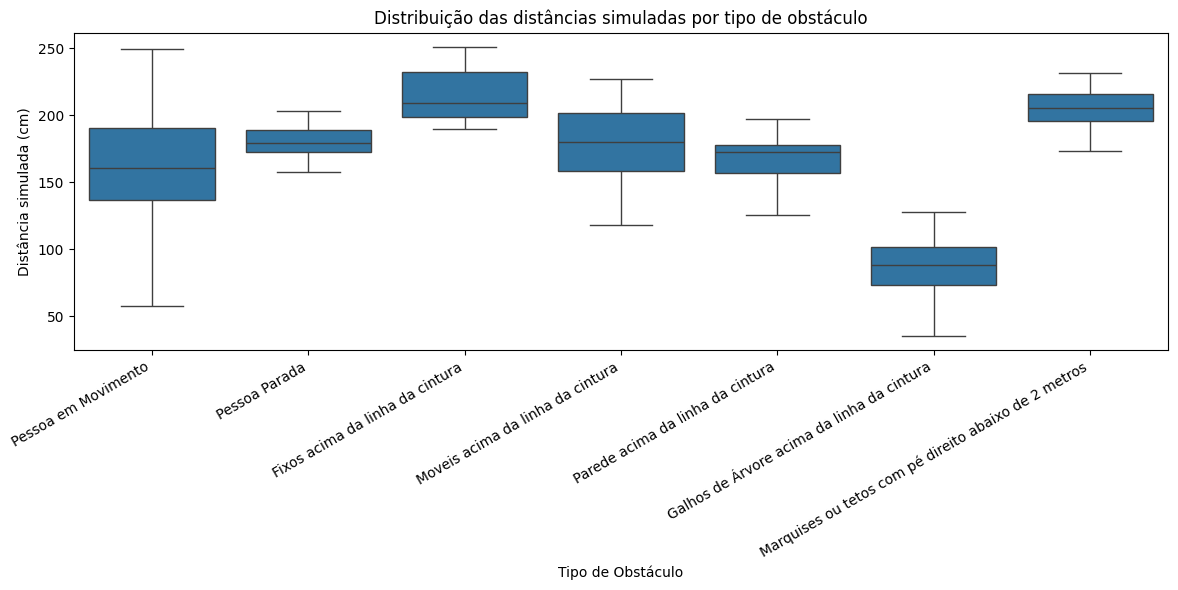

In [ ]:
# Certifique-se de executar a célula de carregamento/geração do DataFrame antes desta!
if 'df' not in globals():
    import pandas as pd
    df = pd.read_csv('dados_sensores_simulados.csv')

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico: Distribuição das distâncias simuladas por tipo de obstáculo
plt.figure(figsize=(12,6))
sns.boxplot(x='nome_obstaculo', y='distancia_cm', data=df, showfliers=False)
plt.xlabel('Tipo de Obstáculo')
plt.ylabel('Distância simulada (cm)')
plt.title('Distribuição das distâncias simuladas por tipo de obstáculo')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


---

**Observações:**
- O dataset gerado pode ser carregado em outros notebooks para pré-processamento e treinamento de modelos de IA.
- Os parâmetros das funções de simulação podem ser ajustados para gerar cenários mais variados ou realistas.
- Para uso no Google Colab, recomenda-se salvar o arquivo no Google Drive (basta montar o drive e ajustar o caminho do arquivo).
